<a href="https://colab.research.google.com/github/yokesh412/unsupervised-project/blob/main/Copy_of_Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [6]:
dataset =pd.read_csv('/content/drive/MyDrive/Online-Retail.csv')

In [7]:
#visualizing dataframe
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Obseravtion:

quantity and unitprice variables has negative value

In [9]:
dataset.loc[(dataset.UnitPrice<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [10]:
dataset.loc[(dataset.Quantity<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [11]:
#Removing the negative values from UnitPrice and Quantity
dataset = dataset[dataset.Quantity > 0]
dataset = dataset[dataset.UnitPrice > 0]

In [12]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Observation:

Negative values from Quantity and Unitprice columns are removed

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [14]:
print(dataset.shape)

(530104, 8)


In [15]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

CustomerID 0.2494  % missing values


Observation:

customerID have 25% of null values


In [16]:
#Removing the Null values from the data.
dataset = dataset[pd.notnull(dataset['CustomerID'])]
dataset = dataset[pd.notnull(dataset['Description'])]

In [17]:
#The proportion of Customers- country wise
dataset.Country.value_counts(normalize=True)

United Kingdom          0.890513
Germany                 0.022720
France                  0.020963
EIRE                    0.018186
Spain                   0.006243
Netherlands             0.005929
Belgium                 0.005105
Switzerland             0.004627
Portugal                0.003674
Australia               0.002971
Norway                  0.002692
Italy                   0.001905
Channel Islands         0.001880
Finland                 0.001722
Cyprus                  0.001543
Sweden                  0.001133
Austria                 0.001000
Denmark                 0.000955
Poland                  0.000829
Japan                   0.000807
Israel                  0.000623
Unspecified             0.000613
Singapore               0.000558
Iceland                 0.000457
USA                     0.000450
Canada                  0.000380
Greece                  0.000364
Malta                   0.000281
United Arab Emirates    0.000171
European Community      0.000151
RSA       

Observation:

 United Kingdom customers, which contains most of our customer’s historical data(90% of customer)

In [18]:
#taking only UK customers
dataset = dataset[dataset.Country == 'United Kingdom']

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354321 non-null  object 
 1   StockCode    354321 non-null  object 
 2   Description  354321 non-null  object 
 3   Quantity     354321 non-null  int64  
 4   InvoiceDate  354321 non-null  object 
 5   UnitPrice    354321 non-null  float64
 6   CustomerID   354321 non-null  float64
 7   Country      354321 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [20]:
!pip install feature-engine

     |████████████████████████████████| 205 kB 9.9 MB/s 
     |████████████████████████████████| 9.8 MB 24.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [21]:
import datetime as dt
import feature_engine

In [22]:
#Transforming InvoiceDate column
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceYearMonth'] = dataset['InvoiceDate'].map(lambda date: 100*date.year+ date.month)
dataset['Date'] = dataset['InvoiceDate'].dt.strftime('%Y-%m')

In [23]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12


**Exploratory data analysis**

In [24]:
import plotly.offline as pyoff
import plotly.graph_objs as go

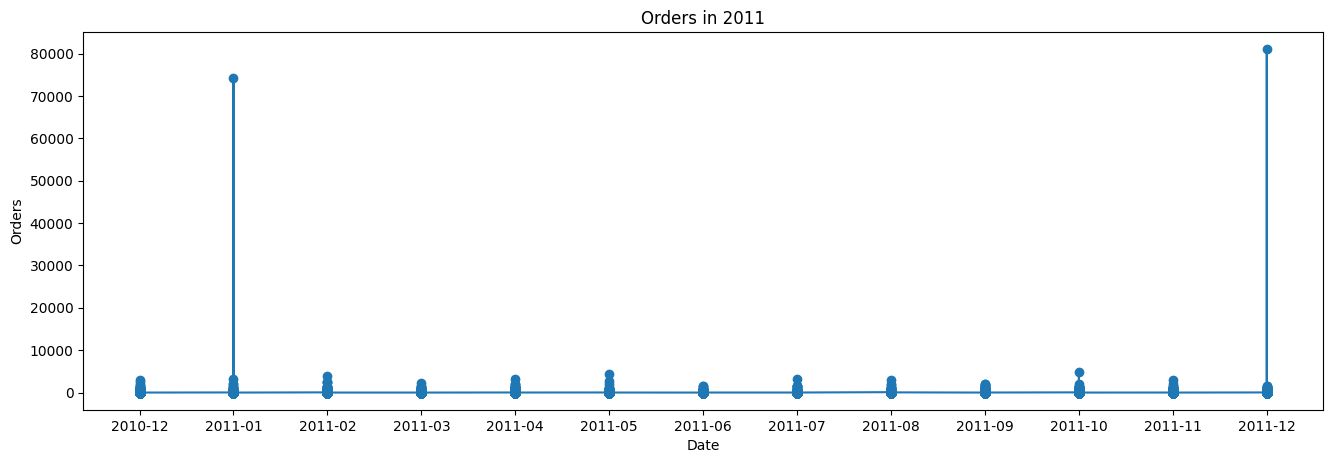

In [25]:
#Function to plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Orders', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()
#plotting
plot_df(dataset, x=dataset.Date, y=dataset.Quantity,title='Orders in 2011')

In [26]:
dataset['Revenue'] = dataset['Quantity']*dataset['UnitPrice']

In [27]:
dataset_revenue = dataset.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

In [28]:
dataset_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,498661.850
1,201101,442190.060
2,201102,355655.630
3,201103,467198.590
4,201104,409559.141


In [29]:
plot_data = [
    go.Scatter(
        x=dataset_revenue['InvoiceYearMonth'],
        y=dataset_revenue['Revenue'],
        mode='lines+markers'
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [30]:
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Date,Revenue
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,201112,2011-12,23.4
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,201112,2011-12,23.6
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,201112,2011-12,30.0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,201112,2011-12,214.8
541893,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom,201112,2011-12,70.8


**RFM analysis**

In [31]:
#last INvoice date is used to calculate recency
last_invoice = dt.date(2011,12,9) 
dataset['Date'] = pd.DatetimeIndex(dataset.InvoiceDate).date

In [32]:
#calculating Recency
dataset_recency = dataset.groupby(by='CustomerID',
						as_index=False)['Date'].max()
dataset_recency.columns = ['CustomerID', 'LastPurchaseDate']
dataset_recency['Recency'] = dataset_recency['LastPurchaseDate'].apply(
	lambda x: (last_invoice - x).days)
dataset_recency.head()


,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [33]:
#Calculating Frequency and Monetary value for each customer
fm_table = dataset.groupby('CustomerID').agg({'InvoiceNo' : lambda x: len(x),'Revenue': lambda x: x.sum()})
fm_table.rename(columns = {'InvoiceNo':'frequency','Revenue':'Monetary'},inplace=True)

In [34]:
fm_table.head()

,frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4595,33719.73
12749.0,199,4090.88
12820.0,59,942.34


In [35]:
#merging recency frequency monetary table
RFM_table = dataset_recency.merge(fm_table,left_on='CustomerID',right_on='CustomerID')

In [36]:
#calculating quartile values for each R, F, M values
quantiles = RFM_table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [37]:
#creating two functions to calculate the Quantile scores for Recency, Frequency and Monetary
def Rscore(x,p,d):
  if x<=d[p][0.25]:
    return 1
  elif x<=d[p][0.50]:
    return 2  
  elif x<=d[p][0.75]:
    return 3
  else :
    return 4    

In [38]:
def FMscore(x,p,d):
  if x<=d[p][0.25]:
    return 4
  elif x<=d[p][0.50]:
    return 3
  elif x<=d[p][0.75]:
    return 2
  else :
    return 1      

In [44]:
RFM_table['R_Quantile'] = RFM_table['Recency'].apply(Rscore,args=('Recency',quantiles))
RFM_table['F_Quantile'] = RFM_table['frequency'].apply(FMscore,args=('frequency',quantiles))
RFM_table['M_Quantile'] = RFM_table['Monetary'].apply(FMscore,args=('Monetary',quantiles))



In [45]:
RFM_table.head()

,CustomerID,LastPurchaseDate,Recency,frequency,Monetary,R_Quantile,F_Quantile,M_Quantile
0,12346.0,2011-01-18,325,1,77183.60,4,4,1
1,12747.0,2011-12-07,2,103,4196.01,1,1,1
2,12748.0,2011-12-09,0,4595,33719.73,1,1,1
3,12749.0,2011-12-06,3,199,4090.88,1,1,1
4,12820.0,2011-12-06,3,59,942.34,1,2,2


In [48]:
RFM_table['RFM_Segment'] = RFM_table.R_Quantile.map(str)+RFM_table.F_Quantile.map(str)+RFM_table.M_Quantile.map(str)
RFM_table['RFM_Score'] = RFM_table[['R_Quantile','F_Quantile','M_Quantile']].sum(axis=1)

In [49]:
RFM_table.head()

,CustomerID,LastPurchaseDate,Recency,frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Segment,RFM_Score
0,12346.0,2011-01-18,325,1,77183.60,4,4,1,441,9
1,12747.0,2011-12-07,2,103,4196.01,1,1,1,111,3
2,12748.0,2011-12-09,0,4595,33719.73,1,1,1,111,3
3,12749.0,2011-12-06,3,199,4090.88,1,1,1,111,3
4,12820.0,2011-12-06,3,59,942.34,1,2,2,122,5


**EXPLORATORY DATA ANALYSIS 2**

In [50]:
#checking skewness of RFM_table
check_skew=[feature for feature in RFM_table ]

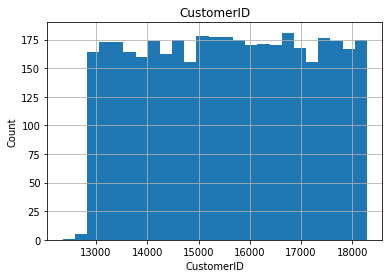

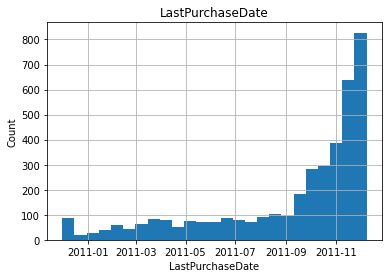

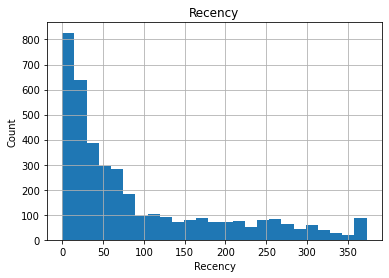

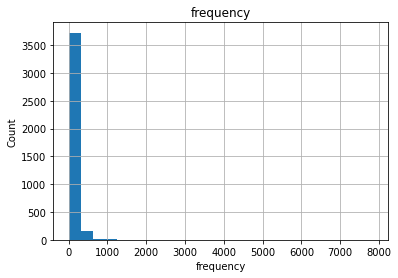

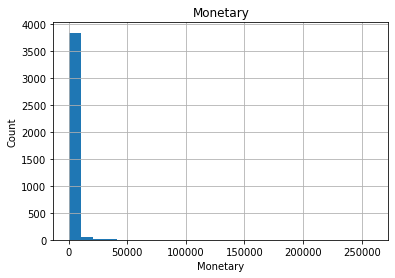

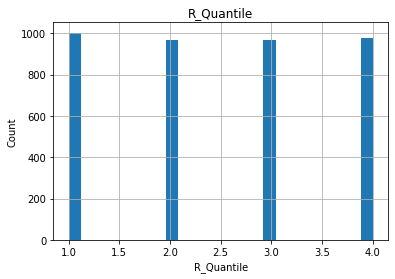

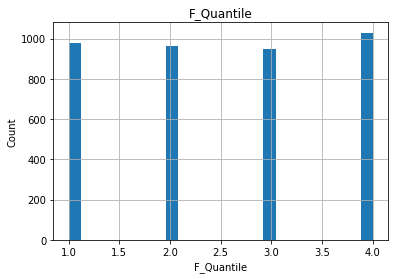

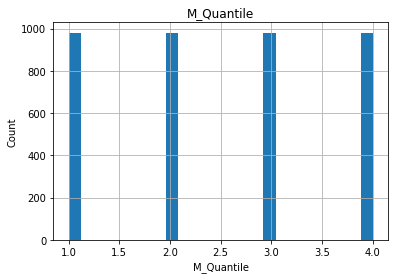

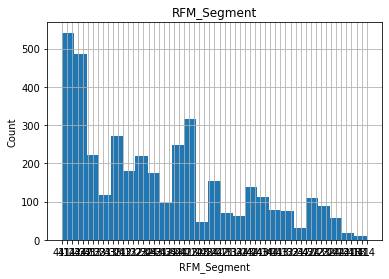

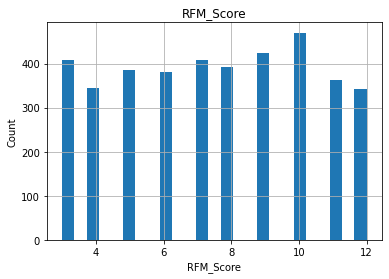

In [51]:
## by creating histograms to understand the distribution

for feature in check_skew:
    data=RFM_table.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Observation:

From above histogram ,we can see that values are highly skewed.we have to apply log transformation to normalise the value.

**FEATURE ENGINEERING:**

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
#applying log transformation 
RFM_table['Recency'] = np.log(RFM_table['Recency']) 
RFM_table['frequency'] = np.log(RFM_table['frequency'])
RFM_table['Monetary'] = np.log(RFM_table['Monetary'])

In [65]:
RFM_table.head(20)

,CustomerID,LastPurchaseDate,Recency,frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Segment,RFM_Score
0,12346.0,2011-01-18,-0.575353,NaN,2.420718,4,4,1,441,9
1,12747.0,2011-12-07,NaN,0.427603,2.121290,1,1,1,111,3
2,12748.0,2011-12-09,NaN,0.757117,2.344287,1,1,1,111,3
3,12749.0,2011-12-06,NaN,0.510691,2.118243,1,1,1,111,3
4,12820.0,2011-12-06,NaN,0.340388,1.924010,1,2,2,122,5
5,12821.0,2011-05-09,-0.656159,-0.539228,1.510630,4,4,4,444,12
6,12822.0,2011-09-30,-0.996439,0.294541,1.925019,3,2,2,322,7
7,12823.0,2011-09-26,-0.972504,-0.742579,2.011268,3,4,1,341,8
8,12824.0,2011-10-11,-1.077668,0.156176,1.789129,3,3,3,333,9
9,12826.0,2011-12-07,NaN,0.409781,1.987357,1,2,2,122,5


In [93]:
RFM_table.isnull().sum()

CustomerID       0
Recency        881
frequency      121
Monetary         0
R_Quantile       0
F_Quantile       0
M_Quantile       0
RFM_Segment      0
RFM_Score        0
dtype: int64

In [95]:
#fill null values
RFM_table=RFM_table.fillna(0)

In [68]:
print(RFM_table.shape)

(3920, 10)


In [74]:
RFM_table = RFM_table.drop(['LastPurchaseDate'],axis=1)

In [75]:
#scaling values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(RFM_table)
RFM_Table_scaled = scaler.transform(RFM_table)

In [78]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled,columns=RFM_table.columns)
RFM_Table_scaled.head()

,CustomerID,Recency,frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFM_Segment,RFM_Score
0,-2.040138,0.882843,NaN,2.869465,1.343880,1.313436,-1.341641,1.385166,0.528481
1,-1.785759,NaN,0.587877,1.337557,-1.327524,-1.343713,-1.341641,-1.397859,-1.596646
2,-1.785125,NaN,1.342459,2.478434,-1.327524,-1.343713,-1.341641,-1.397859,-1.596646
3,-1.784491,NaN,0.778147,1.321971,-1.327524,-1.343713,-1.341641,-1.397859,-1.596646
4,-1.739451,NaN,0.388155,0.328254,-1.327524,-0.457997,-0.447214,-1.305092,-0.888271


In [96]:
RFM_Table_scaled.isnull().sum()

CustomerID       0
Recency        881
frequency      121
Monetary         0
R_Quantile       0
F_Quantile       0
M_Quantile       0
RFM_Segment      0
RFM_Score        0
dtype: int64

In [99]:
RFM_Table_scaled=RFM_Table_scaled.fillna(0)

In [100]:
RFM_Table_scaled.isnull().sum()

CustomerID     0
Recency        0
frequency      0
Monetary       0
R_Quantile     0
F_Quantile     0
M_Quantile     0
RFM_Segment    0
RFM_Score      0
dtype: int64

**BULDING MODEL:**

In [101]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_

In [104]:
plt.plot(k,inertiaa,'bx-')
plt.xlabel('value of k')
plt.ylable('inertia')
plt.title('elbow method using inertia')
plt.show()

NameError: ignored

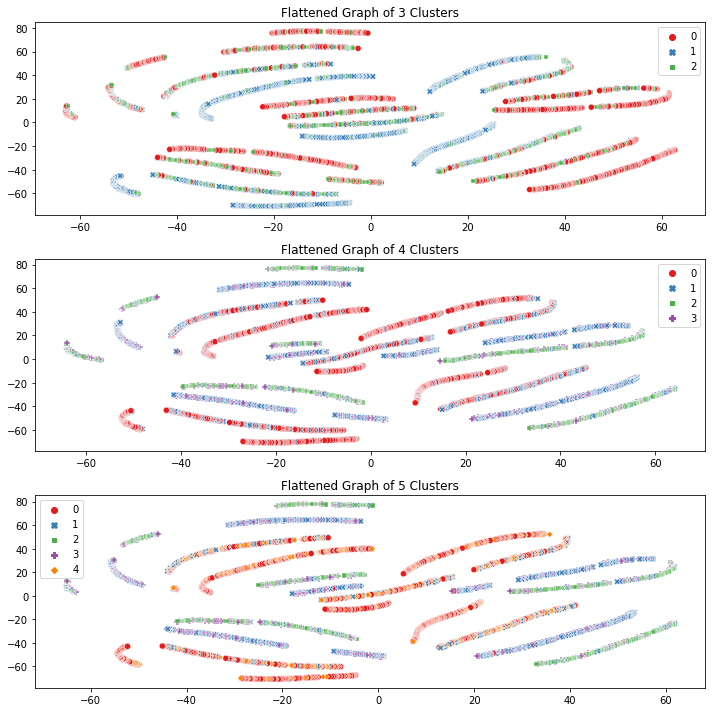

In [106]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(RFM_Table_scaled)
# Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, RFM_table)
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, RFM_table)
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, RFM_table)
plt.tight_layout()

In [111]:
def snake_plot(RFM_Table_scaled, df_rfm_kmeans, df_rfm_original):
RFM_Table_scaled=   (RFM_Table_scaled, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    RFM_Table_scaled['Cluster'] = df_rfm_kmeans['Cluster']
# Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')
plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

IndentationError: ignored